In [1]:
import pandas as pd
df = pd.read_csv('../data/MiceProtein_2f2c.csv')
df.head(5)

,SCI1,NATR2,Response
0,42.207707,5.453817,P
1,38.970469,5.015322,P
2,39.224086,5.078089,P
3,33.271147,5.819807,P
4,31.183694,5.290515,P


In [13]:
## Dataset: Expression values of SCI1 and NATR2 proteins from cerebrospinal fluid (CSF) of trisomic mice
## Mice are treated with a specific drug to stimulate learning. 
## The Response variable shows the response of the mice to the treatment: P: Positive - N: Negative

In [2]:
## Know your data first
## Find out how many samples exist in each class.
## Examine distribution of the expression values of the genes across the classes. (Boxplot, histogram etc.)
df_P = df[df['Response'] == 'P']
df_P.shape[0]

150

In [3]:
print(df.describe())

             SCI1       NATR2
count  300.000000  300.000000
mean    30.000000   10.000000
std      9.141813    3.247432
min      4.705512    3.454569
25%     23.795099    7.676691
50%     29.455225    9.934777
75%     34.728878   11.662236
max     57.913973   21.153137


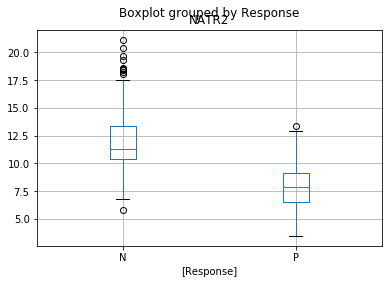

In [5]:
import matplotlib.pyplot as plt
df.boxplot(column=['NATR2'], by=['Response'])
plt.show()

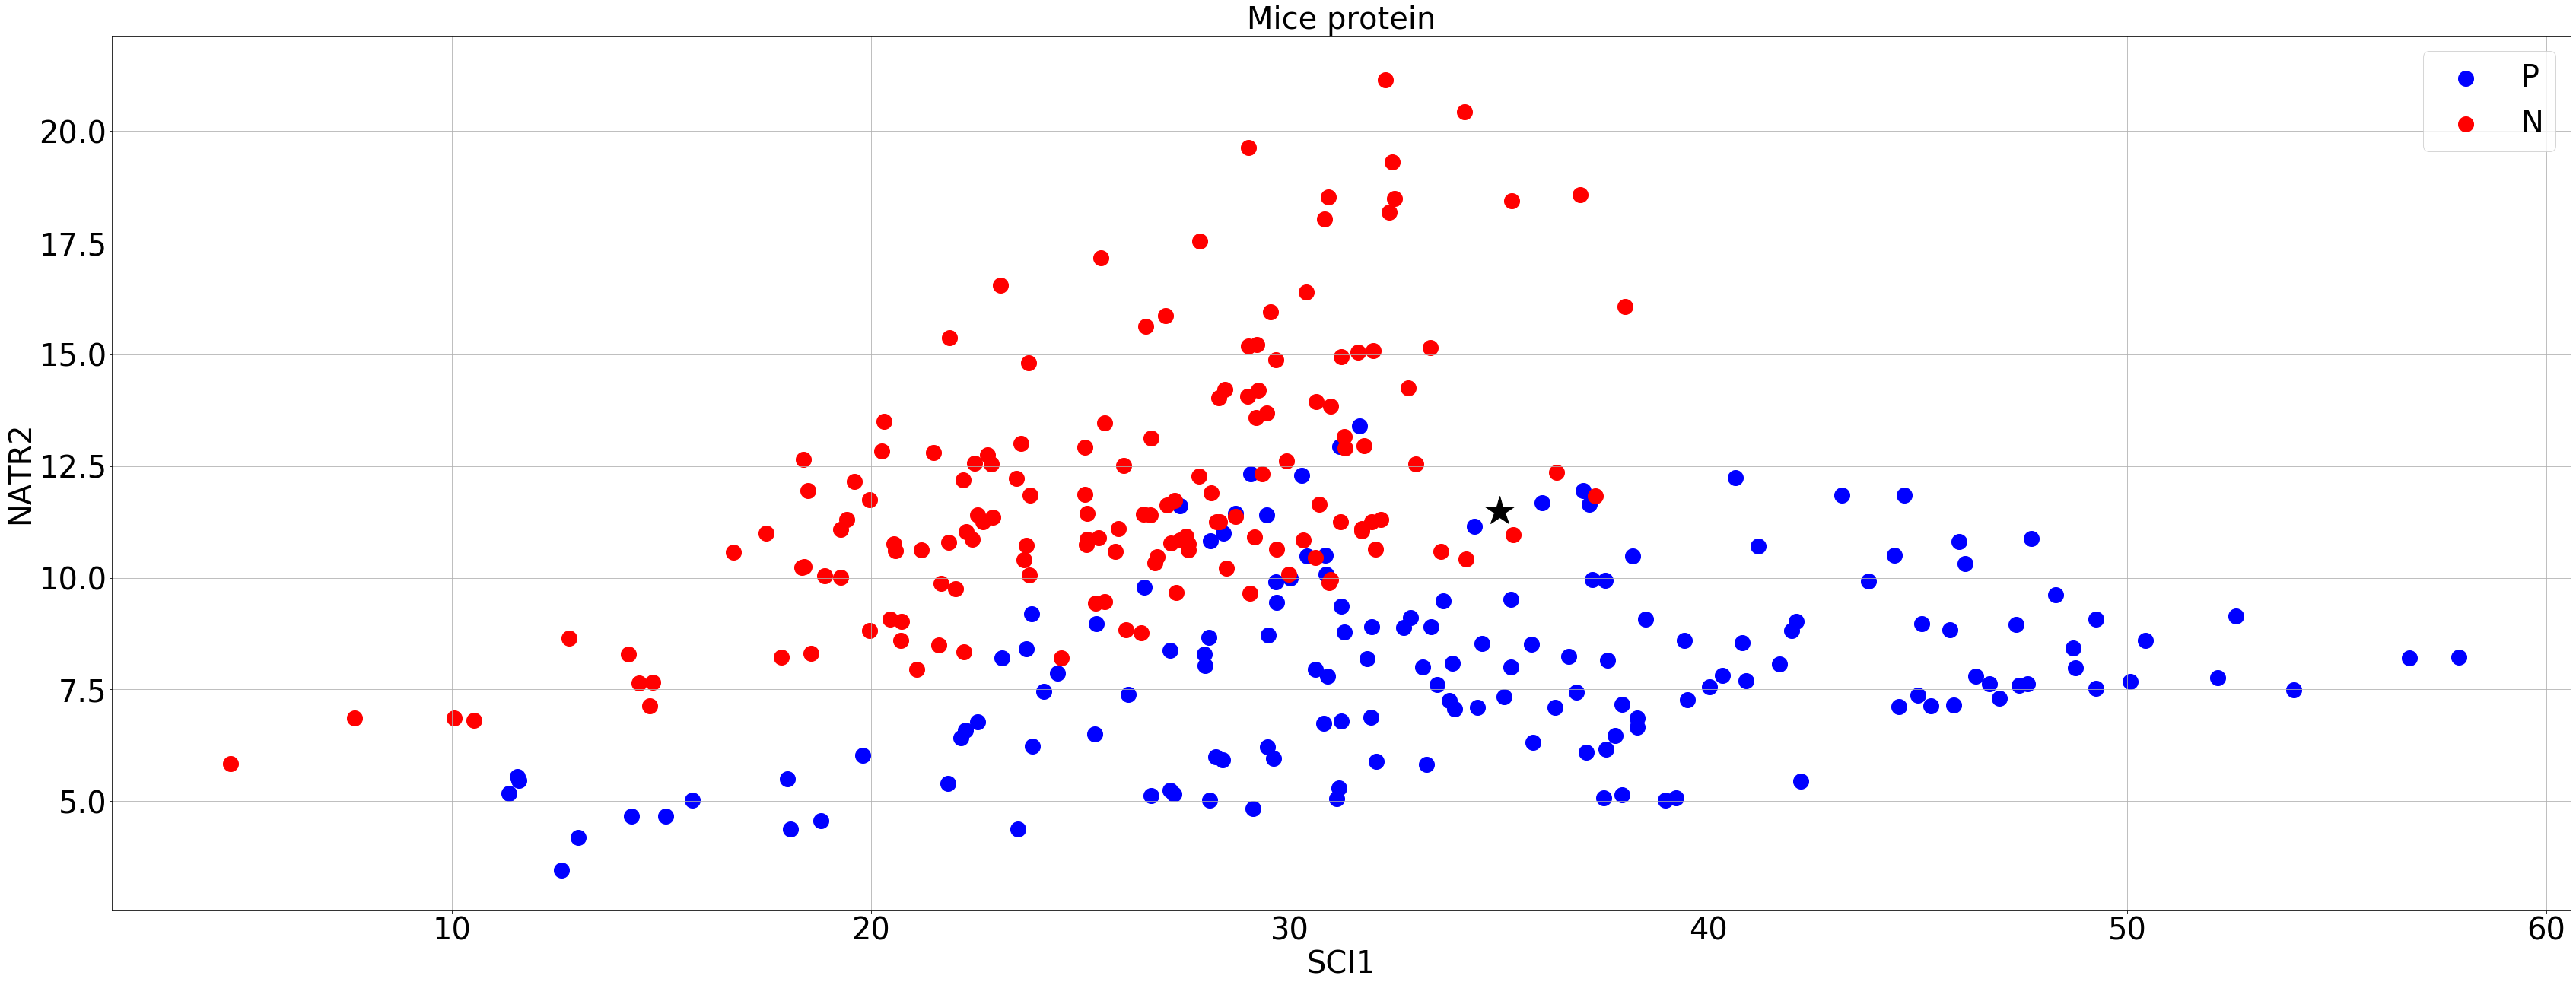

In [6]:
## let's generate the scatter plot of the data in the original scale
import matplotlib.pyplot as plt
plt.figure(figsize = (max(df['SCI1']), max(df['NATR2'])))
plt.xlabel('SCI1', fontsize = 40)
plt.ylabel('NATR2', fontsize = 40)
plt.title('Mice protein', fontsize = 40)
plt.tick_params(axis='both', labelsize=40)
targets = ['P', 'N']
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indices = df['Response'] == target
    plt.scatter(df.loc[indices, 'SCI1']
               , df.loc[indices, 'NATR2']
               , c = color
               , s = 400)
plt.legend(targets, fontsize=40)
plt.grid()
## We have a new mouse with protein expression values 35 and 11.5 for SCI1 and NATR2, respectively.
## Would that mice respond to the drug?
plt.plot(35, 11.5, color='black', marker='*', markersize=40)

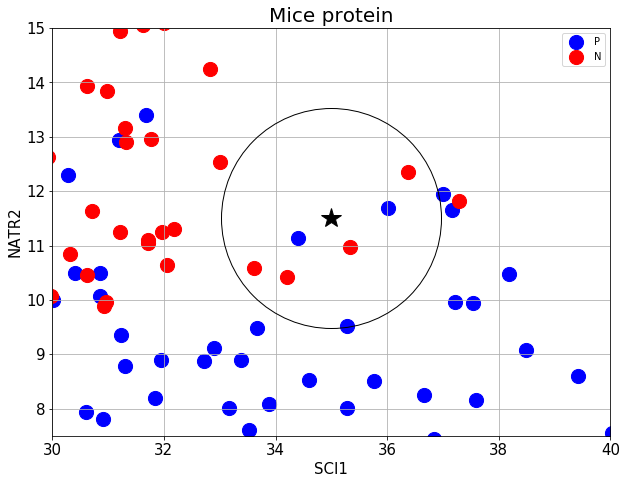

In [7]:
## let's take a closer look at the neighborhood of the new sample
## zooming into the [30,40] range in SCI1 and [7.5,15] range in NATR2 axis
plt.figure(figsize = (10, 7.5)) 
plt.xlabel('SCI1', fontsize = 15)
plt.ylabel('NATR2', fontsize = 15)
plt.title('Mice protein', fontsize = 20)
plt.tick_params(axis='both', labelsize=15)
plt.xlim(30,40)
plt.ylim(7.5,15)
targets = ['P', 'N']
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indices = df['Response'] == target
    plt.scatter(df.loc[indices, 'SCI1']
               , df.loc[indices, 'NATR2']
               , c = color
               , s = 200)
plt.legend(targets)
plt.grid()
plt.plot(35, 11.5, color='black', marker='*', markersize=20)
## plot a circle centered in the new sample - set markersize 80, 120, 220
marker_style = dict(color='black', marker='o', markersize=220, fillstyle='none')
plt.plot(35, 11.5, **marker_style)
plt.savefig("../results/knn_zoom.pdf")

In [8]:
## k-NN implementation step by step
## Calculate Euclidean distances
import numpy as np
test_x=np.array([[35, 11.5]])
Euc_dist = ((df['SCI1'] - test_x[0,0])**2 + (df['NATR2'] - test_x[0,1])**2)**0.5
print(Euc_dist)

0      9.407835
1      7.603662
2      7.686602
3      5.937468
4      7.288477
         ...   
295    6.886170
296    9.096613
297    9.623557
298    4.899723
299    7.080866
Length: 300, dtype: float64


In [9]:
Euc_df = pd.DataFrame({'Euc_dist': Euc_dist})
df_dist = pd.concat([df, Euc_df], axis=1)

In [10]:
df_sortedDist = df_dist.sort_values('Euc_dist')
print(df_sortedDist)

          SCI1      NATR2 Response   Euc_dist
286  35.328458  10.970759        N   0.622881
133  34.410275  11.146482        P   0.687568
57   36.020573  11.687102        P   1.037582
287  34.208460  10.412262        N   1.345255
272  36.369440  12.354002        N   1.613904
..         ...        ...      ...        ...
102  11.362494   5.179193        P  24.468026
189  10.513913   6.811383        N  24.930937
190  10.042702   6.863643        N  25.384297
193   7.663928   6.859300        N  27.727187
192   4.705512   5.837582        N  30.819134

[300 rows x 4 columns]


In [ ]:
from collections import Counter

In [13]:
## predict using different k values and compare the predictions
k = 5
c = Counter(df_sortedDist.head(k)['Response'])
print(c)
## majority voting
value, count = c.most_common()[0]
print(value)
## calculate probabilities assuming equal weights for neighbors
pr_P = c['P'] / k
pr_N = c['N'] / k

Counter({'N': 3, 'P': 2})
N


In [17]:
## k-NN using the package
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=3)
X = df[['SCI1', 'NATR2']].values
y = df[['Response']].values
print(X.shape)
kNN.fit(X, np.ravel(y))
print(kNN.predict(test_x))

(300, 2)
['P']


In [19]:
## probability of the classes in alphabetical order - [prob_N, prob_P]
print(kNN.predict_proba(test_x))

[[0.33333333 0.66666667]]


In [ ]:
## Exercise
## Using KNeighborsClassifier predict probability of the test sample [35, 11.5] belonging to class P for k = (1,3,5,...21)
## plot the probabilities (lineplot)      